## PCA (Part 2)

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

By Mike Gelbart (converted to Julia by Jason Chau)

In [103]:
using Printf
using PyCall
pickle = pyimport("pickle")
plt = pyimport("matplotlib.pyplot")
using PyPlot
using Statistics
SkDecomposition = pyimport("sklearn.decomposition")
using LinearAlgebra

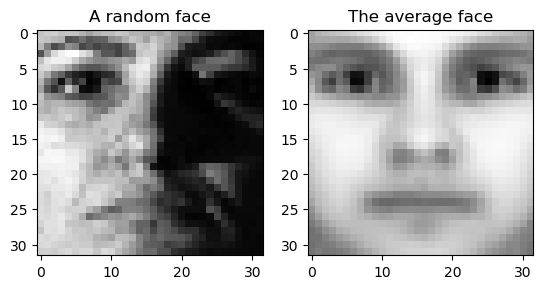

We have 32 faces, each 32x32 pixels.

In [90]:
fo=open("img/faces.pkl","r")
faces = pickle.loads(pybytes(read(fo)))

# helper functions
function display_face(f, cmap="Greys_r", vmin=nothing, vmax=nothing)
    plt.imshow(reshape(f, 32,32), cmap=cmap, vmin=vmin, vmax=vmax)
    plt.tick_params(axis="both", which="both", bottom="off", left="off", labelbottom="off", labelleft="off")
    plt.grid(false)
end
function reconstruct(model, X)
    Z = model.transform(X)
    try
        return model.inverse_transform(Z)
    catch(e) # no inverse_transform function
        W = model.components_
        return Z*W
    end
    # Note on the above: you can't just do Z@W for PCA because of the centring of the data, 
    # which needs to be undone for the reconstruction
end


plt.figure()
plt.subplot(1,2,1)
display_face(faces[rand(1:size(faces)[1]),:])
plt.title("A random face")
plt.subplot(1,2,2)
display_face([Statistics.mean(faces[:,i]) for i in 1:size(faces)[2]])
plt.title("The average face")

N,D = size(faces)
Printf.@printf("We have %d faces, each 32x32 pixels.", M)

## Testing it out with scikit-learn's PCA

In [93]:
pca = SkDecomposition.PCA()
pca.fit(faces)

PyObject PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
cumulative_var_expl = cumsum(pca.explained_variance_ratio_)
for i in 1:20
    Printf.@printf("With %2d components, variance explained = %.0f%%\n", i+1, cumulative_var_expl[i]*100)
end

With  2 components, variance explained = 36%
With  3 components, variance explained = 71%
With  4 components, variance explained = 76%
With  5 components, variance explained = 79%
With  6 components, variance explained = 80%
With  7 components, variance explained = 82%
With  8 components, variance explained = 83%
With  9 components, variance explained = 84%
With 10 components, variance explained = 85%
With 11 components, variance explained = 85%
With 12 components, variance explained = 86%
With 13 components, variance explained = 86%
With 14 components, variance explained = 87%
With 15 components, variance explained = 87%
With 16 components, variance explained = 88%
With 17 components, variance explained = 88%
With 18 components, variance explained = 88%
With 19 components, variance explained = 89%
With 20 components, variance explained = 89%
With 21 components, variance explained = 89%


## Our own implementation

In [107]:
pixel_means = [mean(faces[:,i]) for i in 1:size(faces)[2]]
faces_centered = faces .- pixel_means'
F = svd(faces_centered, full=false)
Z = F.U*Matrix(Diagonal(F.S));

In [109]:
size(pixel_means)

(1024,)

In [110]:
size(Z)

(2414, 1024)

In [112]:
size(F.Vt)

(1024, 1024)

In [117]:
for i in 1:19
    reconstr = Z[:,1:i]*F.Vt[1:i,:]
    var_expl = 1-sum((reconstr-faces_centered).^2)/sum(faces_centered.^2)
    Printf.@printf("With %2d components, variance explained = %.0f%%\n", i, var_expl*100)
end

With  1 components, variance explained = 36%
With  2 components, variance explained = 71%
With  3 components, variance explained = 76%
With  4 components, variance explained = 79%
With  5 components, variance explained = 80%
With  6 components, variance explained = 82%
With  7 components, variance explained = 83%
With  8 components, variance explained = 84%
With  9 components, variance explained = 85%
With 10 components, variance explained = 85%
With 11 components, variance explained = 86%
With 12 components, variance explained = 86%
With 13 components, variance explained = 87%
With 14 components, variance explained = 87%
With 15 components, variance explained = 88%
With 16 components, variance explained = 88%
With 17 components, variance explained = 88%
With 18 components, variance explained = 89%
With 19 components, variance explained = 89%
